### Data Preprocessing:
1. The code begins by importing necessary libraries such as pandas, numpy, matplotlib, seaborn, and various regression models from scikit-learn.
2. It reads a CSV file named "train_data.csv" into a pandas DataFrame `ds_copy`.
3. Missing values are checked and found to be absent in the dataset.
4. Three categorical variables ('sex', 'smoker', 'region') are integer-encoded using dictionaries.
5. The dataset is then saved back to the CSV file.

### Exploratory Data Analysis (EDA):
1. Statistical data visualization is performed using seaborn's heatmap to visualize the correlation matrix of the features in the dataset.

### Outlier Detection:
1. The code defines a function `diagnostic_plots` to create histograms, Q-Q plots, and boxplots for visualizing potential outliers.
2. Outlier detection is performed for variables 'age', 'bmi', and 'charges' using the `diagnostic_plots` function.

### Model Building:
1. The dataset is split into features (`X`) and target (`y`) variables.
2. Several regression models (Linear Regression, Ridge Regression, Lasso Regression, K-Nearest Neighbors, Random Forest, XGBoost, Decision Tree, Gradient Boosting, and Extra Trees) are instantiated.
3. Each model is trained on the training data, and its performance metrics such as R-squared, RMSE, and MAE are calculated on both training and testing datasets.
4. The results are stored in a DataFrame and saved to a CSV file.
5. The best performing models (Random Forest and XGBoost) are saved using pickle.

### Variable Importance:
1. The feature importances of the best model (Gradient Boosting Regressor) are plotted and saved to a PNG file.

### Model Evaluation with Best Hyperparameters:
1. The best hyperparameters for the Gradient Boosting Regressor are loaded from a separate file.
2. The model is instantiated with these hyperparameters and trained on the entire dataset.
3. Performance metrics (Score, MSE, MAE, R2) are calculated on the training data.
4. The metrics are saved to a CSV file.

### Final Model:
1. The finalized model (Gradient Boosting Regressor) is saved using pickle.

### Conclusion:
This code performs end-to-end tasks for predicting personal medical insurance costs, including data preprocessing, exploratory data analysis, model building, evaluation, and finalization. Additionally, it saves important results and models for future use.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset_path = "D://programming//information-technologies-of-smart-systems//calculation-and-graphic work//personal-medical-insurance-cost-prediction//data//final//train_data.csv"

In [3]:
ds_copy = pd.read_csv(dataset_path)

In [9]:
# no missing value
ds_copy.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
def integer_encode(train, variable, ordinal_mapping):
    train[variable] = train[variable].map(ordinal_mapping)

In [5]:
# define ordinal mappings for gender
gender_dict = {'female': 0, 'male': 1}

# apply integer encoding to 'sex' column
for variable in ['sex']:
    integer_encode(ds_copy, variable, gender_dict)

In [6]:
# define ordinal mappings smoker
smoker_dict = {'no': 0, 'yes': 1}

# apply integer encoding to 'smoker' column
for variable in ['smoker']:
    integer_encode(ds_copy, variable, smoker_dict)

In [12]:
# define ordinal mappings for region
region_dict = {'northeast': 0,
            'northwest': 1,
            'southeast': 2,
            'southwest': 3}

# Apply integer encoding to 'region' column
for variable in ['region']:
    integer_encode(ds_copy, variable, region_dict)

In [18]:
ds_copy.to_csv(dataset_path, index=False)

In [10]:
# statistical data visualization
import seaborn as sns

# creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

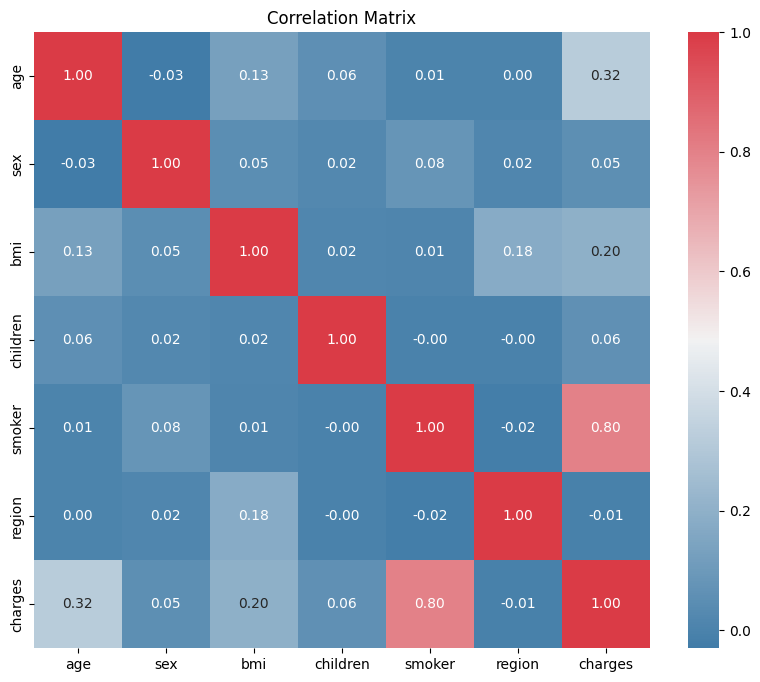

In [14]:
# create a subplot with specified figure size
f, ax = plt.subplots(figsize=(10, 8))

corr = ds_copy.corr()

# Create a heatmap of the correlation matrix
# Set the mask to hide the upper triangle of the heatmap
# Set the color map using seaborn's diverging_palette
# Add annotations to display correlation values in each cell
# Format annotations to two decimal places
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax, annot=True, fmt=".2f")

ax.set_title('Correlation Matrix')
plt.show()

### Outlier Engineering

1. **diagnostic_plots Function**: This function takes a dataframe `df` and a variable name `variable` as input. It generates three diagnostic plots for the specified variable: Histogram, Q-Q plot (Quantile-Quantile plot), and Boxplot.
2. **Histogram**: Shows the distribution of the variable.
3. **Q-Q Plot**: Compares the distribution of the variable against a normal distribution. If the data points fall approximately along the diagonal line, the variable is normally distributed.
4. **Boxplot**: Provides a visual summary of the central tendency, dispersion, and skewness of the data, and identifies potential outliers.
5. **Outlier Detection**: The function `diagnostic_plots` is called three times to generate diagnostic plots for the variables 'age', 'bmi', and 'charges', allowing us to visually identify outliers in the dataset.

In [23]:
from scipy import stats

In [24]:
# function to create histogram, Q-Q plot and
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, color='lightgreen')
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
    plt.gca().get_lines()[0].set_color('blue')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable], color='darkorange')
    plt.title('Boxplot')

    plt.show()

In [21]:
ds_copy.nunique()

age           47
sex            2
bmi          493
children       6
smoker         2
region         4
charges     1070
dtype: int64

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


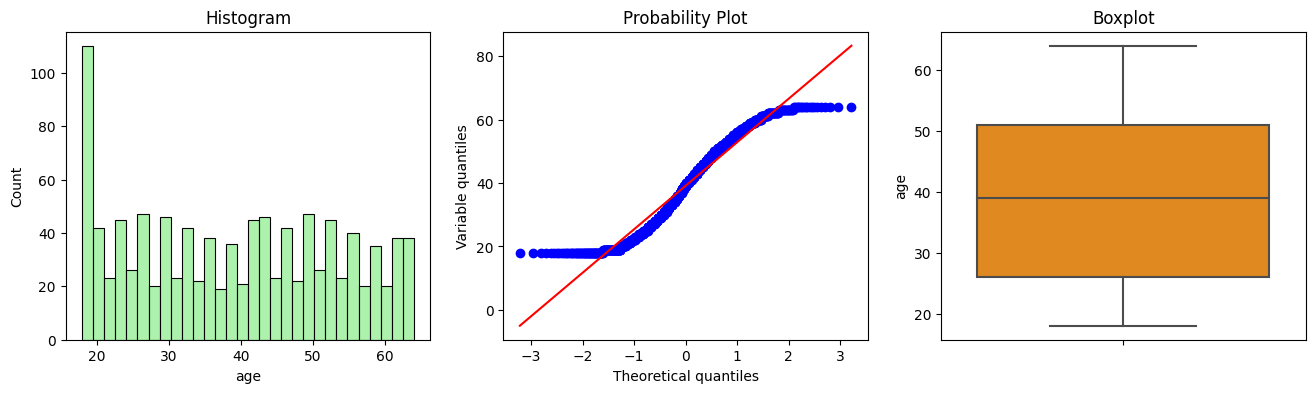

In [25]:
# let's find outliers in age
diagnostic_plots(ds_copy, 'age')

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


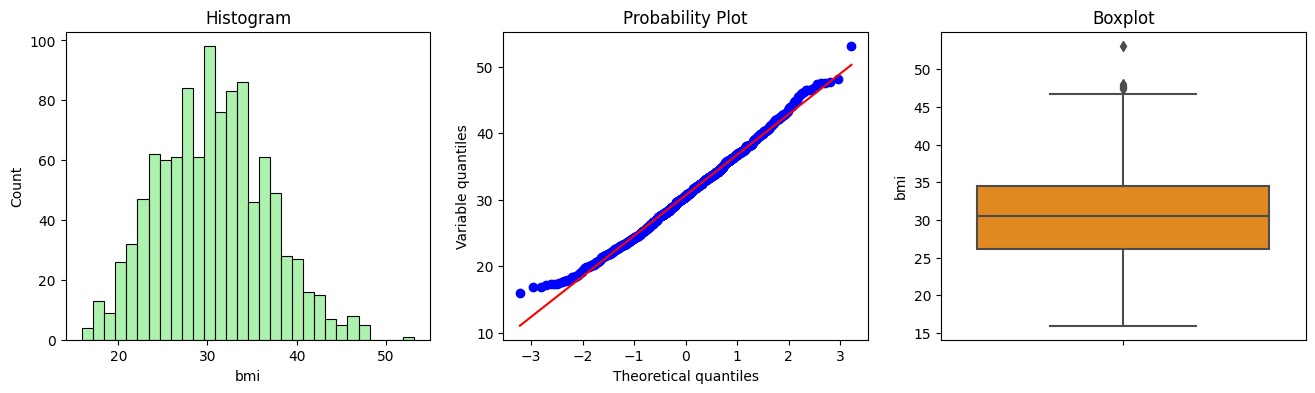

In [26]:
# let's find outliers in bmi
diagnostic_plots(ds_copy, 'bmi')

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


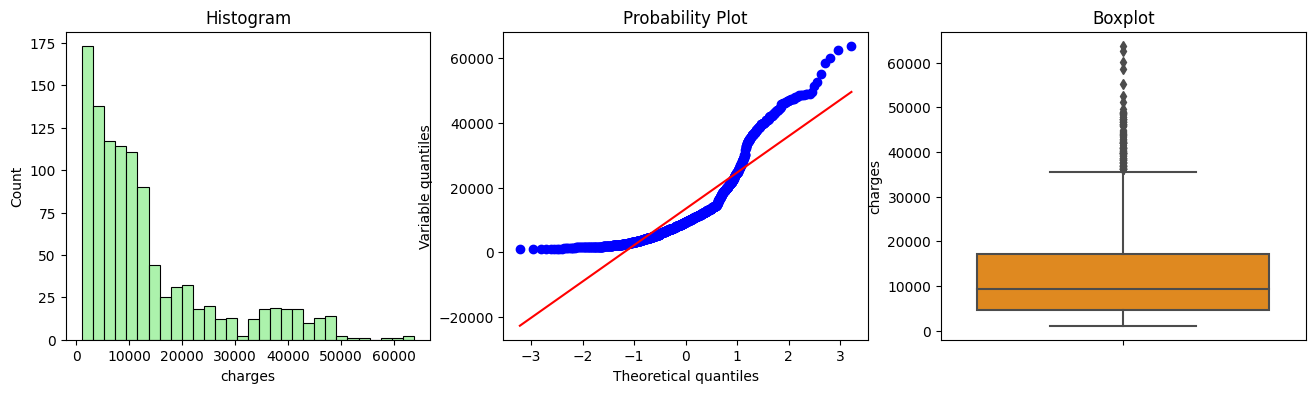

In [27]:
# let's find outliers in charges
diagnostic_plots(ds_copy, 'charges')

### Model Training and Evaluation
- The provided code trains multiple regression models using scikit-learn and XGBoost libraries for predicting medical insurance charges.
- It splits the dataset into training and testing sets, defines regression models, fits them on the training data, and evaluates their performance on both training and testing sets.
- Performance metrics such as R-squared, RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and model training time are calculated and stored in a DataFrame.
- The best performing models are saved along with their evaluation results in a CSV file.
- Additionally, feature importance is visualized using a bar plot, and the plot is saved as an image file.
- The best hyperparameters for the Gradient Boosting Regressor are loaded from a separate file, and the model is trained with these hyperparameters.
- Metrics for the trained Gradient Boosting Regressor are calculated and saved in a CSV file.

### Model Saving
- Trained models are saved using pickle for future use. Random Forest Regressor and XGBoost Regressor models are saved separately.
- The main trained Gradient Boosting Regressor model is saved as well.

### File Paths
- Paths for saving trained models, evaluation results, and metrics are specified.

In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

import xgboost as xgb

In [28]:
import time

In [19]:
# regression evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [29]:
y_column = ['charges'] # target variable

# without features 'region' and 'sex'
X_columns = ['age', 'bmi', 'children', 'smoker']

In [30]:
X = ds_copy[X_columns]
y = ds_copy[y_column]

In [31]:
# import tools for splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

In [45]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define different models
lm = LinearRegression()
ridge = Ridge(random_state = 42)
lasso = Lasso(random_state = 42)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state = 42)
xgbt = xgb.XGBRegressor(random_state = 42)
dtree = DecisionTreeRegressor(random_state = 42)
gbr =  GradientBoostingRegressor(random_state = 42)
etr = ExtraTreeRegressor(random_state = 42)

# list of all regression models
algo = [xgbt, lm, ridge, lasso, knn, rf, dtree, gbr, etr]

# list for results of previous best models
result = []

for i in algo:
        start = time.process_time()
        # fit the model on the training data and calculate performance metrics
        ml_model = i.fit(X_train,y_train)
        
        result.append([str(i).split("(")[0] + str("_baseline"), ml_model.score(X_train, y_train), ml_model.score(X_test, y_test),
                  np.sqrt(mean_squared_error(y_train, ml_model.predict(X_train))),
                  np.sqrt(mean_squared_error(y_test, ml_model.predict(X_test))),
                  mean_absolute_error(y_train, ml_model.predict(X_train)),
                  mean_absolute_error(y_test, ml_model.predict(X_test)),
                  r2_score(y_train, ml_model.predict(X_train)),
                  r2_score(y_test, ml_model.predict(X_test))]),
        print(str(i).split("(")[0]," ✓\t", "{}".format(round(time.process_time()-start,3)),"sec")

# create DataFrame from the result list and set the index as Algorithm
result = pd.DataFrame(result, columns = ["Algorithm", "Train_Score", "Test_Score", "Train_Rmse",
                                         "Test_Rmse", "Train_Mae", "Test_Mae", "Train_R2", "Test_R2"]).sort_values("Test_Rmse").set_index("Algorithm")
result

XGBRegressor  ✓	 0.781 sec
LinearRegression  ✓	 0.297 sec
Ridge  ✓	 0.109 sec
Lasso  ✓	 0.172 sec
KNeighborsRegressor  ✓	 0.172 sec


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor  ✓	 0.641 sec
DecisionTreeRegressor  ✓	 0.016 sec
GradientBoostingRegressor  ✓	 0.094 sec
ExtraTreeRegressor  ✓	 0.016 sec


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


,Train_Score,Test_Score,Train_Rmse,Test_Rmse,Train_Mae,Test_Mae,Train_R2,Test_R2
Algorithm,,,,,,,,
GradientBoostingRegressor_baseline,0.926031,0.807461,3380.123663,5390.202021,1784.259666,2777.516033,0.926031,0.807461
RandomForestRegressor_baseline,0.980168,0.789718,1750.197861,5633.092967,933.476021,2906.177191,0.980168,0.789718
XGBRegressor_baseline,0.996140,0.771610,772.190228,5870.616449,429.782645,3259.345925,0.996140,0.771610
DecisionTreeRegressor_baseline,0.999405,0.699972,303.054329,6728.625997,16.551655,3235.105794,0.999405,0.699972
Lasso_baseline,0.775723,0.697995,5885.738623,6750.758653,4068.318026,4498.615196,0.775723,0.697995
LinearRegression_baseline,0.775723,0.697989,5885.738061,6750.830495,4067.896295,4498.376587,0.775723,0.697989
Ridge_baseline,0.775692,0.697854,5886.136724,6752.330919,4081.403189,4509.427251,0.775692,0.697854
ExtraTreeRegressor_baseline,0.999405,0.677570,303.054329,6975.301416,16.551655,3499.569242,0.999405,0.677570
KNeighborsRegressor_baseline,0.438096,0.101613,9316.212881,11643.329417,6341.680767,7969.557174,0.438096,0.101613


In [ ]:
results_path = 'D://programming//information-technologies-of-smart-systems//calculation-and-graphic work//personal-medical-insurance-cost-prediction//models//model_results.csv'

In [46]:
# save results in csv-file
result.to_csv(results_path)

In [60]:
# for file saving
import pickle

In [61]:
# save additional trained Random Forest Regressor model
with open('D:/programming/information-technologies-of-smart-systems/calculation-and-graphic work/personal-medical-insurance-cost-prediction/models/randomforest_model.sav', 'wb') as file:
    pickle.dump(rf, file)

In [62]:
# save additional trained XGB Regressor model
with open('D:/programming/information-technologies-of-smart-systems/calculation-and-graphic work/personal-medical-insurance-cost-prediction/models/xgb_model.sav', 'wb') as file:
    pickle.dump(xgbt, file)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


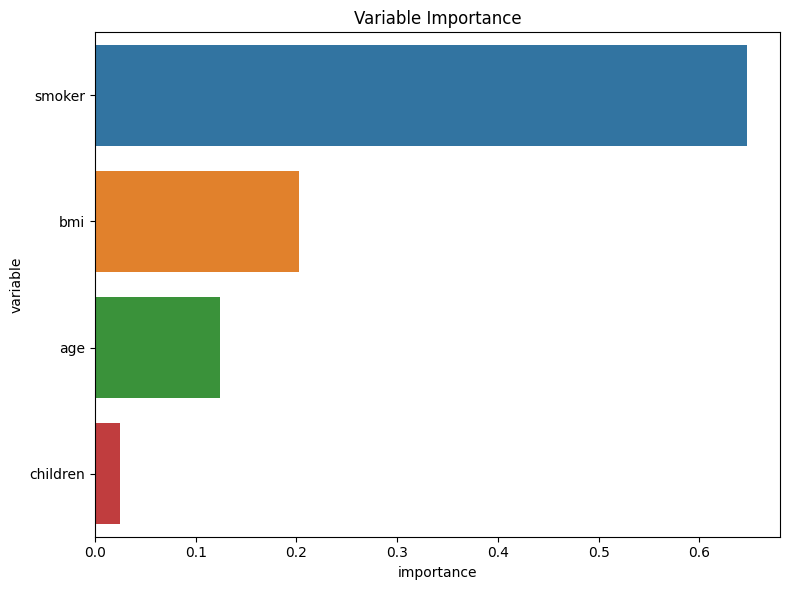

In [49]:
# plot for feature importance
rankings = ml_model.feature_importances_.tolist()
importance = pd.DataFrame(sorted(zip(X_train.columns,rankings),reverse=True),columns=["variable","importance"]).sort_values("importance",ascending = False)

plt.figure(figsize=(8,6))
sns.barplot(x="importance",
            y="variable",
            data=importance[:5])
plt.title('Variable Importance')
plt.tight_layout()

In [51]:
# save the plot to a file
plt.savefig('D://programming//information-technologies-of-smart-systems//calculation-and-graphic work//personal-medical-insurance-cost-prediction//models//variable_importance.png')

# confirm that the plot has been successfully saved
print("The plot has been saved in the file variable_importance.png")

The plot has been saved in the file variable_importance.png


<Figure size 640x480 with 0 Axes>

In [47]:
# display baseline model params
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [54]:
import sys
sys.path.append('D:/programming/information-technologies-of-smart-systems/calculation-and-graphic work/personal-medical-insurance-cost-prediction/models')

# load the parameters from the file
from model_best_hyperparameters import params

In [55]:
# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None, random_state=42)

In [58]:
# convert DataFrame to Series and use iloc to access the column
gbr = GradientBoostingRegressor(**params, random_state = 42).fit(X_train, y_train.iloc[:, 0])

Y_train_pred = gbr.predict(X_train)

# calculating metrics
score_train = gbr.score(X_train, y_train)
mse_train = mean_squared_error(y_train, Y_train_pred)
mae_train = mean_absolute_error(y_train, Y_train_pred)
r2_train = r2_score(y_train, Y_train_pred)

# function to format score_train in desired pattern
def format_score(score):
    return "{:.6f}".format(score)

# Displaying metrics in a grid
metrics_df = pd.DataFrame({
    'Metric': ['Score', 'MSE', 'MAE', 'R2'],
    'Train Data': [format_score(score_train), mse_train, mae_train, r2_train]
})

print(metrics_df)

  Metric       Train Data
0  Score         0.903198
1    MSE  15202678.308422
2    MAE       2116.43609
3     R2         0.903198


In [64]:
# define the file path
file_path = 'D:/programming/information-technologies-of-smart-systems/calculation-and-graphic work/personal-medical-insurance-cost-prediction/models/gradient-boosting-metrics.csv'

# save the DataFrame to a CSV file
metrics_df.to_csv(file_path, index=False)

# print a message confirming the file has been saved
print("Metrics have been saved to:", file_path)

Metrics have been saved to: D:/programming/information-technologies-of-smart-systems/calculation-and-graphic work/personal-medical-insurance-cost-prediction/models/gradient-boosting-metrics.csv


In [ ]:
# filepath for main trained model
gbr_path = 'D:/programming/information-technologies-of-smart-systems/calculation-and-graphic work/personal-medical-insurance-cost-prediction/models/finalized_model.sav'

In [63]:
# save main trained Gradient Boosting Regressor model
with open(gbr_path, 'wb') as file:
    pickle.dump(gbr, file)